$\textbf{Student:}$ Carlos Daniel Fontes da Silva\
$\textbf{E-mail:}$ carlos.fontes@ee.ufcg.edu.br

# Assignment 1: Sampling and recovering of a signal

We will see the sampling and recovering process using a bunch of different signals.

In [236]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal
from scipy import signal

In [ ]:
def Recovering(t, s_amos, Ts):
    s = 0
    for i in range(len(s_amos)):
        s += s_amos[i]*np.sin(np.pi*(t - i*Ts)/Ts) / (np.pi*(t - i*Ts)/Ts)
    return s

In [ ]:
class Signal():
    def __init__(self, t):
        self.t = t
    
    def constante(self, A):
        x = A*np.linspace(1, 1, len(self.t))
        return x
    
    def seno(self, A, f, phi):
        x = A*np.sin(2*np.pi*f*self.t + phi)
        return x
    
    def cosseno(self, A, f, phi):
        x = A*np.cos(2*np.pi*f*self.t + phi)
        return x
    
    def ondaQuadrada(self, A, T):
        x = A*signal.square(2*np.pi*self.t/T, 0.5)
        return x
    
    def ondaTriangular(self, A, T):
        x = A*signal.sawtooth(2*np.pi*self.t/T, 0.5)
        return x
    
    def ruido(self, σ2, μ):
        x = normal(μ, np.sqrt(σ2), len(self.t))
        return x

In [234]:
t_max = 10                        # Duration of the signal
t = np.linspace(0, t_max, 1000)

Fs = 5                            # Sampling frequency
Ts = 1/Fs                         # Sampling period

n = np.arange(0, t_max, Ts)       # Sampling instants


Olá! Qual função deseja analisar?
 1 - Constante
 2 - Seno
 3 - Cosseno
 4 - Onda quadrada
 5 - Onda triangular
 6 - Ruido
3
Amplitude: 1

Frequência: 0.5

Fase: 0


<ipython-input-164-3eeabce38ca6>:4: RuntimeWarning: invalid value encountered in true_divide
  s += s_amos[i]*np.sin(np.pi*(t - i*Ts)/Ts) / (np.pi*(t - i*Ts)/Ts)


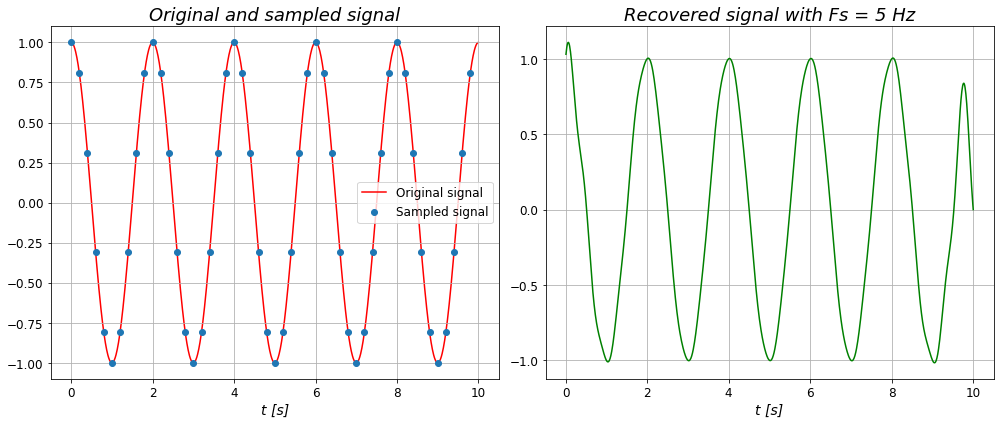

\Deseja realizar outra transformada?
 s 
 n 
n


In [235]:
s_orig = Signal(t)
s_amos = Signal(n)

d = 's'

while(d == 's'):
    fig, axs = plt.subplots(1, 2, figsize = (14, 6))
    
    i = int(input('\nOlá! Qual função deseja analisar?\n 1 - Constante\n 2 - Seno\n 3 - Cosseno\n 4 - Onda quadrada\n 5 - Onda triangular\n 6 - Ruido\n'))
    
    if(i == 1):
        A = float(input('Amplitude: '))
        
        s1 = s_orig.constante(A)
        s2 = s_amos.constante(A)
        
    elif(i == 2):
        A = float(input('Amplitude: '))
        f = float(input('\nFrequência: '))
        phi = float(input('\nFase: '))
        
        s1 = s_orig.seno(A, f, phi)
        s2 = s_amos.seno(A, f, phi)
        
    elif(i == 3):
        A = float(input('Amplitude: '))
        f = float(input('\nFrequência: '))
        phi = float(input('\nFase: '))
        
        s1 = s_orig.cosseno(A, f, phi)
        s2 = s_amos.cosseno(A, f, phi)
        
    elif(i == 4):
        A = float(input('Amplitude: '))
        T = float(input('\nPeríodo: '))
        
        s1 = s_orig.ondaQuadrada(A, T)
        s2 = s_amos.ondaQuadrada(A, T)
        
    elif(i == 5):
        A = float(input('Amplitude: '))
        T = float(input('\nPeríodo: '))
        
        s1 = s_orig.ondaTriangular(A, T)
        s2 = s_amos.ondaTriangular(A, T)
        
    else:
        σ2 = float(input('Variância: '))
        μ = float(input('\nMédia: '))
        
        s1 = s_orig.ruido(σ2, μ)
        s2 = s_amos.ruido(σ2, μ)
    
    axs[0].plot(t, s1, 'r', zorder = 1, label = 'Original signal')
    axs[0].scatter(n, s2, zorder = 2, label = 'Sampled signal')
    axs[0].set_title('Original and sampled signal', fontsize = 18, fontstyle = 'italic')
    axs[0].set_xlabel('t [s]', fontsize = 14, fontstyle = 'italic')
    axs[0].tick_params(axis = 'both', labelsize = 12)
    axs[0].legend(fontsize = 12)
    axs[0].grid()
    
    axs[1].plot(t, Recovering(t, s2, Ts), 'g')
    axs[1].set_title('Recovered signal with Fs = '+str(Fs)+' Hz', fontsize = 18, fontstyle = 'italic')
    axs[1].set_xlabel('t [s]', fontsize = 14, fontstyle = 'italic')
    axs[1].tick_params(axis = 'both', labelsize = 12)
    axs[1].grid()
    plt.tight_layout()
    plt.show()
    
    
    d = input('\Deseja realizar outra transformada?\n s \n n \n')

del s_orig
del s_amos